# **Machine Learning Practice Project: SuperKart**

--------------------
## **Context:**
--------------------

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. 
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

---------------------------
## **Objective:**
----------------------------

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

---------------------------------
## **Data Description:**
---------------------------------

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - the weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
* Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - the year in which the store was established
* Store_Size - the size of the store depending on sq. feet like high, medium, and low
* Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store


## **Importing the necessary libraries and overview of the dataset**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# import warnings
# warnings.filterwarnings("ignore")

### **Importing the Dataset**

In [2]:
kart = pd.read_csv("data/Superkart.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data = kart.copy()

### **View the first and last 5 rows of the dataset**

In [4]:
# Check the head of the data
kart.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [5]:
# Check the tail of the data
kart.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
kart.shape

(8763, 12)

### **Check the data types of the columns for the dataset**

In [7]:
# Check for information of the data
kart.dtypes

Product_Id                    object
Product_Weight               float64
Product_Sugar_Content         object
Product_Allocated_Area       float64
Product_Type                  object
Product_MRP                  float64
Store_Id                      object
Store_Establishment_Year       int64
Store_Size                    object
Store_Location_City_Type      object
Store_Type                    object
Product_Store_Sales_Total    float64
dtype: object

**Observations:**

- There are 8763 observations and 12 columns in the data.
- **Product_Id** is an unique identifier for each product. This item is composed by 2 letters at beginning followed by a number. It will be interesting to review if this 2 letters have any meaning. This column by itself can be dropped as it would not add any value to our analysis.
- The data set has, in adition to this Product_id, 6 object features: **Product_Sugar_Content**, **Product_Type**, **Store_Id**, **Store_Size**, **Store_Location_City_Type**, **Store_Type**. There are also 5 numerical features, 4 floats: **Product_Weight**, **Product_Allocated_Area**, **Product_MRP**, **Product_Store_Sales_Total**, and 1 int:**Store_Establishment_Year**.

### **Checking for missing values in the dataset** ###

In [8]:
kart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [9]:
# Check for missing values in the data
kart.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

In [10]:
# Check for duplicate values
kart.duplicated().sum()

0

**Observations:**

- All the column have 8763 non-null values, i.e., there are no missing values in the data.
- Data contains unique rows. There is no need to remove any rows.

## **Exploratory Data Analysis**

#### Let's check the statistical summary of the data

In [11]:
kart.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD6114,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
- Product_Sugar_Content, Product_Type, Store_Id, Store_Size, Store_Location_City_Type, and Store_Type can be consider as categorical features.
- The mean product weight is 12 units of weight, the min weight is \~2.22 and the max value is 22.
- There are 4 different types of sugar content in the products.Approx half of products are Low Sugar, the most common value in Product_Sugar_Content.
- The Product_Allocated_Area has a mean value of ~0.0687 with an std of 0.0482. The max value is 0.298. Maybe there are some outliers present in this feature.
- There are 16 different product types. Fruits and Vegetables is the most common product type in the database.
- Half of the products register a maximum retail price (Product_MRP) above 146.7.
- The products are distributed in 4 different stores. Store 4 allocate around half of the products.
- Around half of the products are located in stores founded in 2009, the oldest store was founded in 1987.
- There are 3 different size stores. More than half of the products are located in medium size store.
- Products are distributed in 3 different location city type, the most common is Tier 2 (more than half of the product are in Tier 2)
- The revenue generated from the sale of a particular product at a certain outlet varies from 33 to 8000 with 50% of the values lying above 3452.34.

#### Let's check the count of each unique category in each of the categorical variables

In [12]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

FD6114    1
FD8349    1
DR3530    1
NC5926    1
FD3575    1
         ..
FD2396    1
FD681     1
FD8077    1
DR3118    1
FD306     1
Name: Product_Id, Length: 8763, dtype: int64
--------------------------------------------------
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64
--------------------------------------------------
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64
--------------------------------------------------
OUT004    4676
OUT001    1586
OUT003    134

**Observations:**

- Product_Id is an unique identifier for each product. This item is composed by 2 letters at beginning followed by a number. It will be interesting to review if this 2 letters have any meaning. This column by itself can be dropped as it would not add any value to our analysis.
- Product_Sugar_Content has 4 different values Low Sugar, Regular, No Sugar, and reg. reg is the same as Regular, so we need to fix this value. Half of the products are classified as Low Sugar.
- Fruits and Vegetables and Snack Foods are the most common Product_Type, followed by Frozen Foods, Dairy, and Household.
- The store OUT004 holds above the half of the products. 
- More than half of the products are located in medium size store.
- More than half of the products are located in city type Tier 2.
- Supermarket Type2 is the most common store in the dataset.

In [13]:
# Replacing reg category with Regular in Product_Sugar_Content feature

data.Product_Sugar_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [14]:
# Print the value counts for each class in Product_Sugar_Content feature
data.Product_Sugar_Content.value_counts()

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64

**Observation:**

- Almost half of the products are Low Sugar, followed by Regular, and No Sugar.

In [15]:
# Extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [16]:
data["Product_Id_char"].unique() # Fill the blank to get all unique elements in Product_Id_char

array(['FD', 'NC', 'DR'], dtype=object)

In [17]:
data.Product_Id_char.value_counts()

FD    6539
NC    1519
DR     705
Name: Product_Id_char, dtype: int64

In [18]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique() # Fill the blank to get all unique elements

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [19]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique() # Fill the blank to get all unique elements

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

In [20]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique() # Fill the blank to get all unique elements

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

In [21]:
pd.crosstab(index=data.Product_Id_char, columns=data.Product_Type)

Product_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Product_Id_char,,,,,,,,,,,,,,,,
DR,0,0,0,0,0,0,0,186,0,0,0,0,0,0,519,0
FD,716,200,106,677,796,811,1249,0,0,0,618,0,76,1149,0,141
NC,0,0,0,0,0,0,0,0,628,740,0,151,0,0,0,0


Observation:
- We can see that FD is being used in the Product_Id of the food items.
- We can see that DR is being used in the Product_Id of the drinks.
- We can see that NC is being used in the Product_Id of no comestible items.

#### The Product_Id column will not add any value to our analysis so let's drop it before we move forward

In [22]:
## Drop the Product_Id column. Hint: use inplace = True and axis = 1
data.drop('Product_Id', axis=1, inplace=True)

In [23]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


## **Univariate Analysis**

In [24]:
# Importing libraries
import matplotlib.patheffects as path_effects
import matplotlib as mpl

from scipy.stats import pearsonr

# Global variable to use in plots.
suptitle_param = dict(color='darkslategray', weight='bold', fontsize='x-large')

def histogram_boxplot(feature, bins="auto", figsize=(6, 3)):
    """ Boxplot and histogram combined
    feature: pandas.series
    bins: number of bins (default "auto")
    figsize: size of fig (default (6, 3))
    """
    mean = feature.mean()
    median = np.median(feature)
    min_v = feature.min()
    max_v = feature.max()
    
    sns.set(font_scale=.75) 
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, color='red',
                showmeans=True, 
                meanprops={"marker":"o", 
                           "markerfacecolor":"goldenrod", 
                           "markeredgecolor":"silver", 
                           "markersize":"10"})
    
    text = ax_box.annotate("Mean {:,.4f}".format(mean), fontsize='small',
                           xy=(mean, -0.15), color='g', weight='bold', ha='center')
    text.set_path_effects([path_effects.Stroke(linewidth=3, 
                                               foreground='black'), path_effects.Normal()])
    ax_box.set_ylabel('BoxPlot\n')
    ax_box.set_xlabel('')
    
    # For histogram
    sns.histplot(x=feature, kde=False, bins=bins, ax=ax_hist)
    ax_hist.axvline(mean, color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(median, color='black', linestyle='-') # Add median to the histogram
    
    min_max_pos = 0.05 * ax_hist.get_ylim()[1]
    text = ax_hist.annotate("Median {:,.4f}".format(median), fontsize='small',
                            xy=(median, ax_hist.get_ylim()[1]/2), 
                            color='w', weight='bold', ha='center')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='k'), path_effects.Normal()])
    text = ax_hist.annotate("Min {:,.4f}".format(min_v), fontsize='small',
                            xy=(min_v, min_max_pos), 
                            color='w', weight='bold', ha='left')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='k'), path_effects.Normal()])
    text = ax_hist.annotate("Max {:,.4f}".format(max_v), fontsize='small',
                            xy=(max_v, min_max_pos), 
                            color='w', weight='bold', ha='right')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='k'), path_effects.Normal()])
    
    ax_hist.set_ylabel('HistPlot')
    ax_hist.set_xlabel('')
    
    # Calculating the skewness
    # If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. 
    # If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. 
    # If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.
    skewness = feature.skew()
    if skewness<-1: skewness_str = 'Extremely Negative Skewed'
    elif skewness<-0.5: skewness_str = 'Negative Skewed'
    elif skewness==0: skewness_str = 'Simetrical Distributed'
    elif skewness<=0.5: skewness_str = 'Nearly Simmetrical'
    elif skewness<=1: skewness_str = 'Positive Skewed'
    elif skewness>1: skewness_str = 'Extremely Positive Skewed'
    f.suptitle(f'{feature.name.upper()}\nSkew: {skewness:0.4f} ({skewness_str})', **suptitle_param)
    plt.subplots_adjust(hspace=1, top=0.9)
    plt.tight_layout()

    plt.show()
    plt.style.use('default')

**Product_Weight**

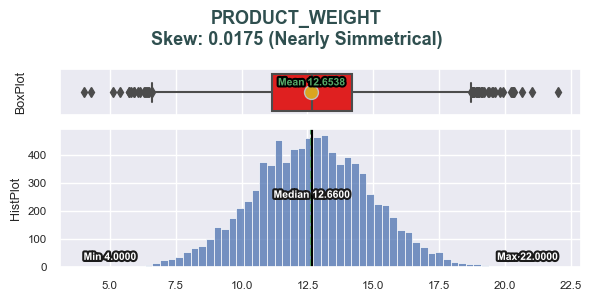

In [25]:
histogram_boxplot(data.Product_Weight)

**Observation:**

- The product weight is uniformly distributed with mean and median lying around 12.6.
- There are some outliers in both side of the boxplot.

**Product_Allocated_Area**

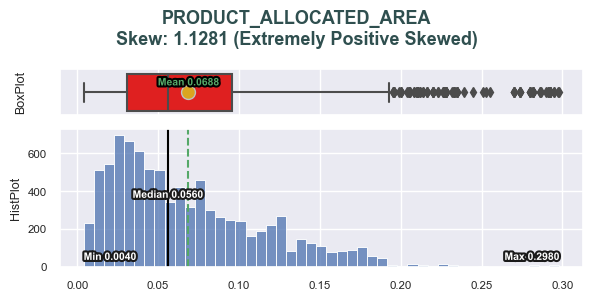

In [26]:
# Plot the histogram and the boxplot for 'Product_Allocated_Area'
histogram_boxplot(data.Product_Allocated_Area)

**Observation:**

- The distribution is right skewed with the median lying around 0.05 and some outliers to the right.

**Product_MRP**

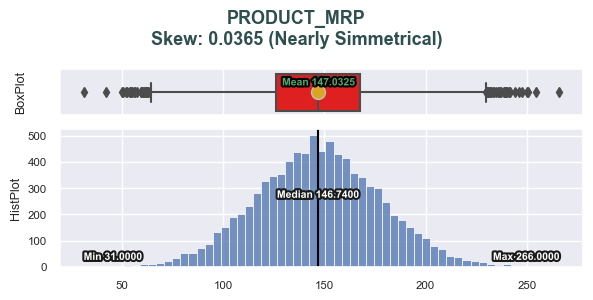

In [27]:
# Plot the histogram and the boxplot for 'Product_MRP'
histogram_boxplot(data.Product_MRP)

**Observation:**
- The product MRP is uniformly distributed with mean and median lying around 147.
- There are some outliers in both side of the boxplot.

**Product_Store_Sales_Total**

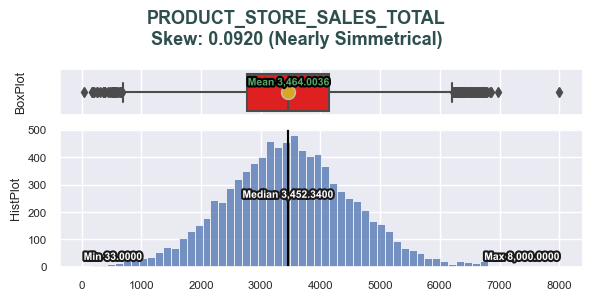

In [28]:
# Plot the histogram and the boxplot for 'Product_Store_Sales_Total'
histogram_boxplot(data.Product_Store_Sales_Total)

**Observation:**

- The product store sales total is uniformly distributed with mean and median lying around 3,460.
- There are some outliers in both side of the boxplot.

In [29]:
# Function to create labeled barplots
def labeled_barplot(feature, rotation=0, top=None, title=None, figsize=(6, 3)):
    """Countplot of a categorical variable
    feature: pandas.series
    rotation: rotation of xticks (default 0)
    top: max rows to return. If none is provided all rows are returned. (Default: None)
    title: title of the plot. If none value is provided, feature names are displayed. 
    (Default: None)
    figsize: size of fig (default (6, 3))
    """
    title = title if title else feature.name
    
    sns.set(font_scale=.75)
    total = len(feature) # Length of the column
    plt.figure(figsize = figsize)
    
    # Convert the column to a categorical data type
    feature = feature.astype('category')
    origin = feature.copy()
    
    labels = feature.value_counts().index
    if top:
        labels = labels[:top]
        feature = feature.loc[feature.isin(labels)]

    ax = sns.countplot(x=feature, palette='Paired', order=labels)
    ax.set_xlabel('')
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    for container in ax.containers:
        labels = [f'{h:.0f}\n( {h/origin.count()*100:0.1f}% )' 
                  if (h := v.get_height()) > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='edge', 
                     fontsize='small', weight='bold') # color='white', label_type='center'
    ylim = plt.ylim()
    plt.ylim(ylim[0], ylim[1]*1.1)
        
    plt.suptitle(title, **suptitle_param)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    # plt.autoscale(enable=True, axis='y', tight=False)
    
    plt.show() 
    plt.style.use('default')

**Product_Sugar_Content**

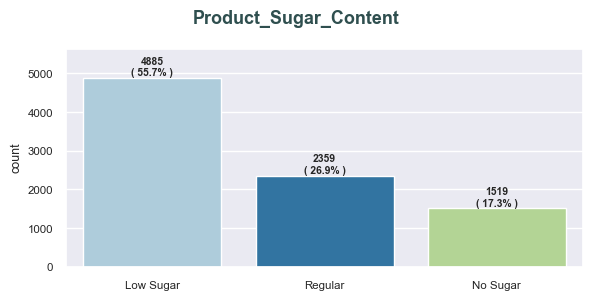

In [30]:
labeled_barplot(data.Product_Sugar_Content) # Plot for Product_Sugar_Content

**Observations:**

- Around 56% of the products are having low sugar followed by 27% products which are having regular sugar content.
- Around 17% of the products are having no sugar content.


**Product_Type**

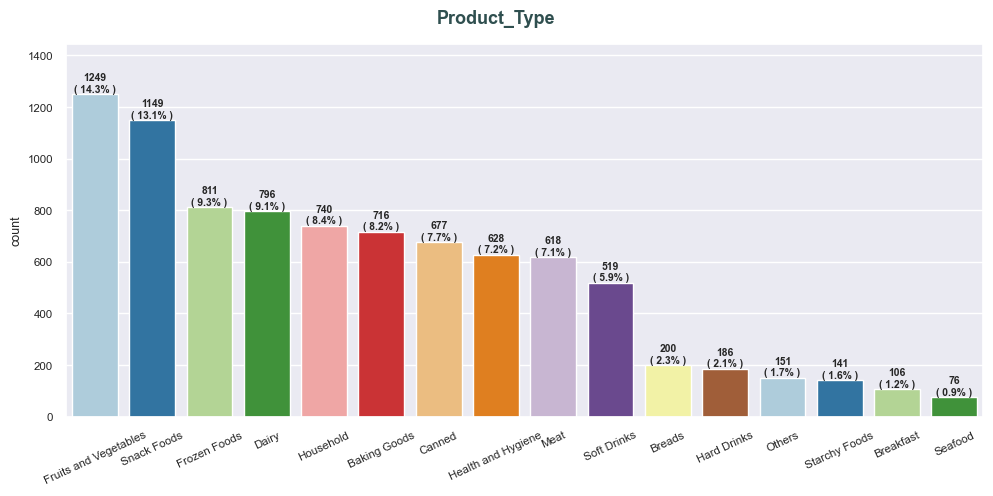

In [31]:
# Plot the labelled barplot for 'Product_Type'
labeled_barplot(data.Product_Type, rotation=25, figsize=(10, 5))

**Observations:**

- Fruits and vegetables (14%) and Snack Foods (13%) have been bought the highest number of times from all the stores combined.
- Seafood (1%) has been bought the lowest number of times.
- The highest product type which is Fruits and Vegetables is 14 times the lowest product type which is sea food.

**Store_Id**

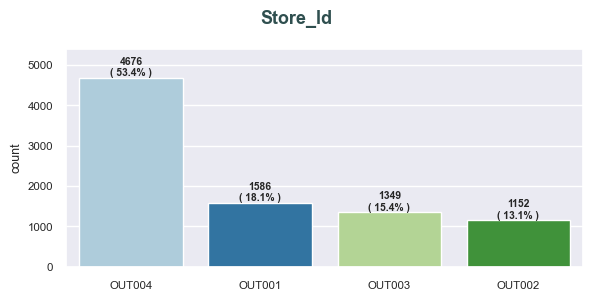

In [32]:
# Plot the labelled barplot for 'Store_Id'
labeled_barplot(data.Store_Id)

**Observations:**

- Around 53% of the products are being sold from outlet OUT004. An almost equal number of products have been sold from the other three stores each.
- When compared to the four Store_Ids the products, which are being sold from outlet OUT002 are low.

**Store_Size**

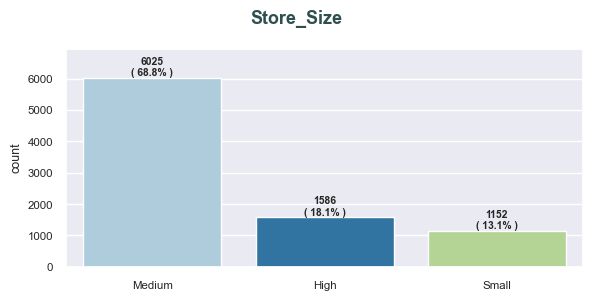

In [33]:
# Plot the labelled barplot for 'Store_Size'
labeled_barplot(data.Store_Size)

**Observations:**
- Around 69% of the products have been sold from the stores which are medium in size
- The products that have been sold from the stores which are high and small are almost the same in size.

**Store_Location_City_Type**

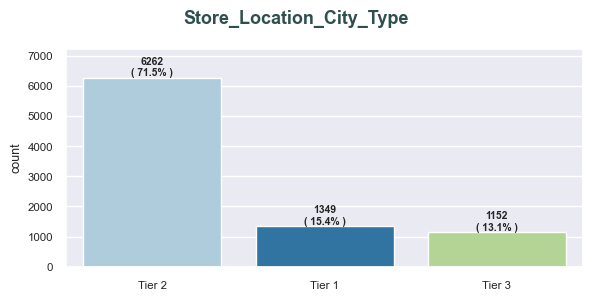

In [34]:
# Plot the labelled barplot for 'Store_Locatiom_City_Type'
labeled_barplot(data.Store_Location_City_Type)

**Observations:**

- Around 72% of the products have been sold from stores which are located in Tier 2 cities.
- The products that have been sold from the stores are located in Tier 1 and Tier 3 cities are almost the same.

**Store_Type**

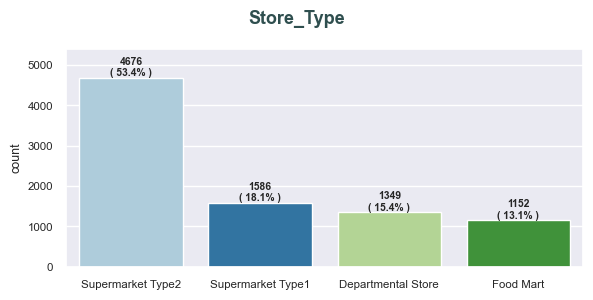

In [35]:
# Plot the labelled barplot for 'Store_Type'
labeled_barplot(data.Store_Type)

**Observations:**

- Around 53% of the products have been sold from stores that are of Supermarket Type2.
- The products that have been sold from stores which are of Supermarket Type1, Food Mart and Departmental Store are almost same.

### **Bivariate Analysis**

In [36]:
# Defining a customized correlation plot function
def correlation_plot(df, figsize = (5, 3), cbar_kws={}):
    """Plot a heatmap of the correlation between numerical variables in df.
    df: dataframe.
    """
    corr = df.corr(numeric_only=True)

    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    sns.set(font_scale=0.75)
    plt.figure(figsize = figsize)
    sns.heatmap(corr, annot=True, mask=mask, cmap='vlag', cbar_kws=cbar_kws)
    plt.title('Correlation between numerical variables', **suptitle_param)
    plt.show()
    plt.style.use('default')

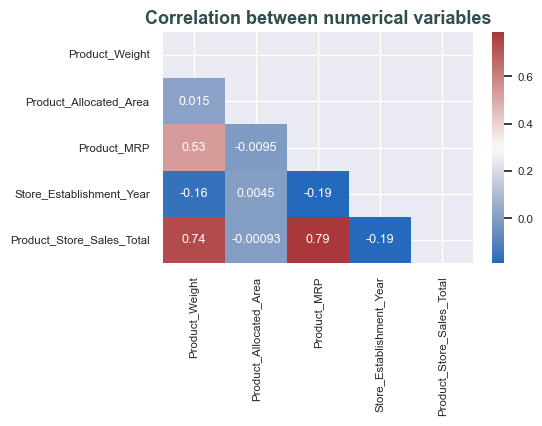

In [37]:
# Correlation check
correlation_plot(data)

**Observations:**

- Product weight and product MRP are highly correlated with our target variable i.e Product_Store_Sales_Total.
- Product weight and product MRP are moderately correlated with each other.
- There is not much correlation among the rest of the variables.
- Store_Establishment_Year is highly negatively correlated with our target variable i.e Product_Store_Sales_Total.

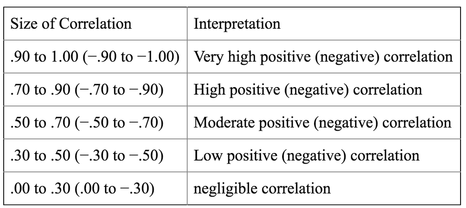

In [38]:
# Function to create a custom scatterplot
def custom_scatter_plot(feature_x, feature_y, hue=None, title=None, figsize=(6, 4)):
    """Scatter plot of feature x and feature y, colored by hue.
    feature_x: pandas.series. Feature in x axis.
    feature_y: pandas.series. Feature in y axis.
    hue: pandas.series. Feature in hue.
    title: title of the plot. If none value is provided, feature names are displayed. (Default: None)
    figsize: size of fig (default (6, 3))
    """
    title = title if title else f'{feature_x.name} vs {feature_y.name}'
    
    sns.set(font_scale=.75)
    plt.figure(figsize = figsize)
    sns.scatterplot(x = feature_x, y = feature_y, hue=hue)
    if feature_x.mean()>1000: plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    if feature_y.mean()>1000: plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.suptitle(title, **suptitle_param)
    plt.tight_layout()
    
    plt.show() 
    plt.style.use('default')

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the numeric columns**

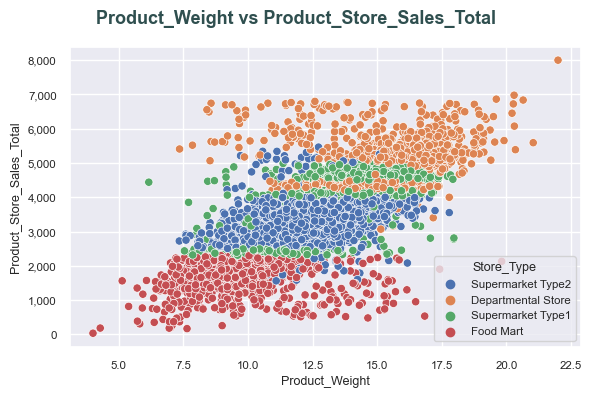

In [39]:
custom_scatter_plot(data.Product_Weight, data.Product_Store_Sales_Total, hue=data.Store_Type)

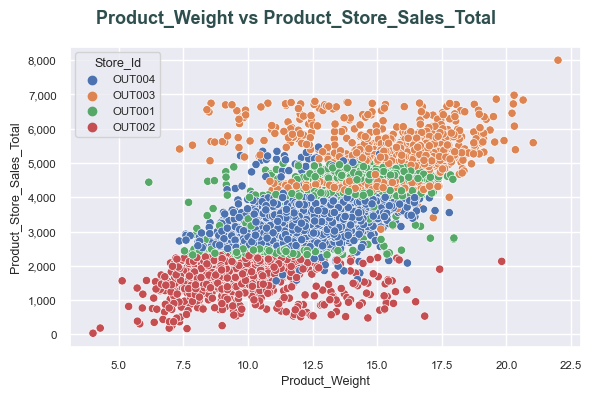

In [40]:
custom_scatter_plot(data.Product_Weight, data.Product_Store_Sales_Total, hue=data.Store_Id)

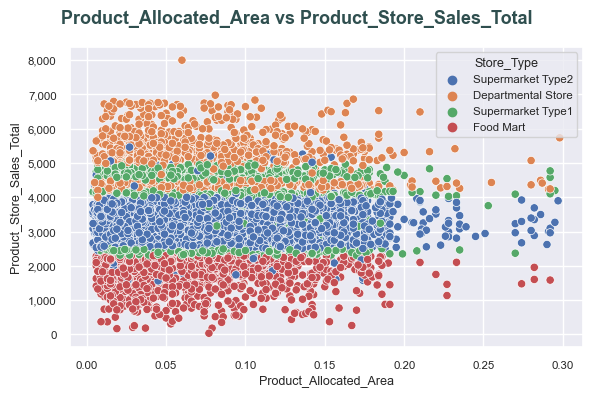

In [41]:
# Plot the scatterplot of Product_Allocated_Area against Product_Store_Sales_Total 
custom_scatter_plot(data.Product_Allocated_Area, data.Product_Store_Sales_Total, hue=data.Store_Type)

**Observation:**

- Product_Weight and Product_Store_Sales_Total are almost linearly correlated with each other.  
- There seem to be no relationship between Product_Allocated_Area and Product_Store_Sales_Total.
- It looks that there is a clear common patron between Store_Type and Store_Id

In [42]:
# Defining a custom barplot
def custom_barplot(feature, rotation=0, label_rotation=0, title=None, figsize=(8, 2)):
    """Shows a bar plot of the feature.
    feature: pandas.series.
    rotation: rotation of xticks (default 0).
    title: title of the plot. If none value is provided, feature names are displayed. 
    (Default: None).
    figsize: size of fig (default (8, 2)).
    """
    sns.set(font_scale=0.75)
    ax = feature.plot(kind='bar', figsize=figsize)
    if feature.mean()>1000: plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    for container in ax.containers:
        ax.bar_label(container, fontsize='small', rotation=label_rotation, fmt=' {:,.1f}') # color='white', label_type='center'
    ylim = plt.ylim()
    plt.ylim(ylim[0], ylim[1]*1.25)
    title = title if title else feature.name
    plt.suptitle(title, **suptitle_param) 
    plt.xticks(rotation=rotation)
    plt.show()
    plt.style.use('default')
    
def custom_3var_barplot(df, x, y, hue, rotation=0, label_rotation=0, title=None, label_visible=True, figsize=(10, 3)):
    """Shows a bar plot of the feature.
    df: pandas.DataFrame. Dataset.
    x: pandas.Series. feature_x
    y: pandas.Series. feature_y
    hue: pandas.Series. hue
    rotation: rotation of xticks (default 0).
    title: title of the plot. If none value is provided, feature names are displayed. 
    (Default: None).
    label_visible: Bool. Visibility of data label
    figsize: size of fig (default (10, 3)).
    """
    sns.set(font_scale=0.75)
    fig = plt.figure(figsize = figsize)
    ax = sns.barplot(data=df, x=x, y=y, hue=hue)
    if df[y].mean()>1000: plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    if label_visible:
        for container in ax.containers:
            ax.bar_label(container, fontsize='small', rotation=label_rotation, fmt=' {:,.1f}') 
            # color='white', label_type='center'
        ylim = plt.ylim()
        plt.ylim(ylim[0], ylim[1]*1.25)
    title = title if title else f'{y} per {x}'
    plt.suptitle(title, **suptitle_param) 
    plt.xticks(rotation=rotation)
    plt.show()
    plt.style.use('default')

**Let us see from which product type the company is generating most of the revenue**

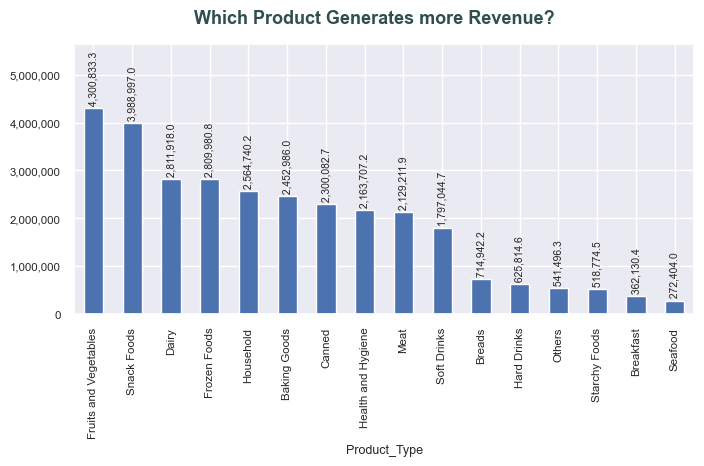

In [43]:
custom_barplot(data.groupby(["Product_Type"])["Product_Store_Sales_Total"].sum().sort_values(ascending=False), 
               rotation=90, label_rotation=90, figsize=(8, 3.5),
               title='Which Product Generates more Revenue?')

**Observations:**
    
- Fruits and vegetables and snack foods are the biggest contributors to the revenue of the company(SuperKart).
- Seafood is the lowest contributor to the revenue of the company(SuperKart).
- Dairy and Frozen foods are contributing almost the same to the revenue of the company.

**Product_Sugar_Content**

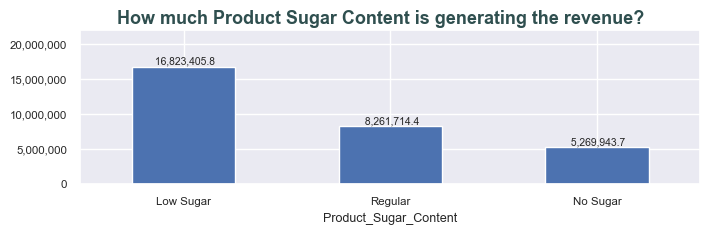

In [44]:
# Plot the barplot to see how much Product_Sugar_Content is generating the revenue
custom_barplot(data.groupby(["Product_Sugar_Content"])["Product_Store_Sales_Total"].sum().sort_values(ascending=False), 
               title='How much Product Sugar Content is generating the revenue?')

**Observations:**

- Low sugar content materials are the biggest contributors to the revenue of the company(SuperKart).
- No Sugar content materials are the lowest contributors to the revenue of the company(SuperKart).

**Let us see from which type of stores and locations the revenue generation is more**

**Store_Id**

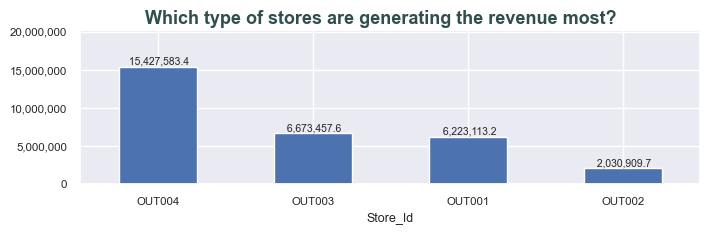

In [45]:
# Plot the barplot to see how much Store_Id is generating the revenue
custom_barplot(data.groupby(["Store_Id"])["Product_Store_Sales_Total"].sum().sort_values(ascending=False), 
               title='Which type of stores are generating the revenue most?')

**Store_Type**

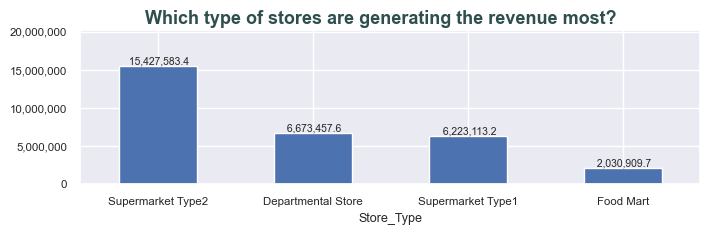

In [46]:
# Plot the barplot to see how much Store_Type is generating the revenue
custom_barplot(data.groupby(["Store_Type"])["Product_Store_Sales_Total"].sum().sort_values(ascending=False), 
               title='Which type of stores are generating the revenue most?')

**Observations:**

- OUTOO4 is contributing the most to the revenue of the company which is more than double the contribution being made by second-placed store OUT003.
- OUT002 is contributing the least to the revenue of the company which is two times less than OUT001 and OUT003.
- Stores of Supermarket Type 2 are performing exceptionally well.
- Stores of SuperKart Type 1 and Departmental Store are almost contributing the same revenue to the company.
- Supermarket Type 2 provide the same values as OUTOO4. Department Store same as OUTOO3, Supermarket Type 1 as OUTOO1, and Food Mart as OUTOO2.
- We can drom the Store Id as we have the same values in Store Type

**Store_Size**

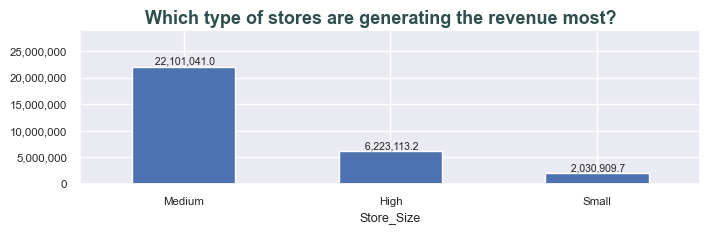

In [47]:
# Plot the barplot to see how much Store_Size is generating the revenue
custom_barplot(data.groupby(["Store_Size"])["Product_Store_Sales_Total"].sum().sort_values(ascending=False), 
               title='Which type of stores are generating the revenue most?')

**Observations:**

- The medium-sized stores are contributing heavily to the revenue.
- The high-sized stores are contributing the least to the revenue.

**Store_Location_City_Type**

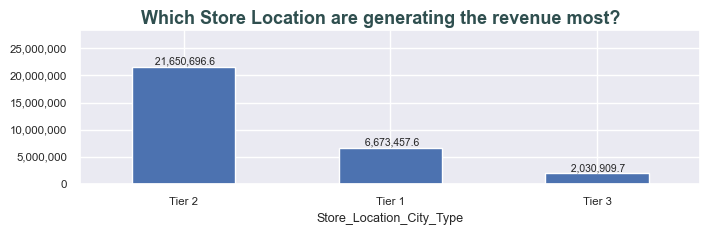

In [48]:
# Plot the barplot to see how much Store_Location_City_Type is generating the revenue
custom_barplot(data.groupby(["Store_Location_City_Type"])["Product_Store_Sales_Total"].sum().sort_values(ascending=False), 
               title='Which Store Location are generating the revenue most?')

**Observations:**

- Stores in the Tier 2 cities are contributing the most to the revenue of SuperKart.
- Stores in the Tier 3 cities are contributing the least to the revenue of SuperKart.

In [49]:
def custom_boxplot(feature_x, feature_y, hue=None, rotation=0, title=None, figsize=(10, 3)):
    """Boxplot of the feature_y divided by feature_x. Colored by hue_var.
    feature_x: Pandas Series. Categorical variable to plot.
    feature_y: Pandas Series. Continuous variable to plot.
    hue: Pandas Series. Third variable as classifier to plot.
    rotation: rotation of xticks (default 90).
    title: title of the plot. If none value is provided, feature names are displayed. (Default: None).
    figsize: Size of the plot. Default=(10, 3)
    """
    title = title if title else f'{feature_y.name} by {feature_x.name}'
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.75)
    sns.boxplot(x=feature_x, y=feature_y, hue=None)
    plt.xticks(rotation=rotation)
    plt.title(title, **suptitle_param)
    plt.show()
    plt.style.use('default')

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the other categorical columns**

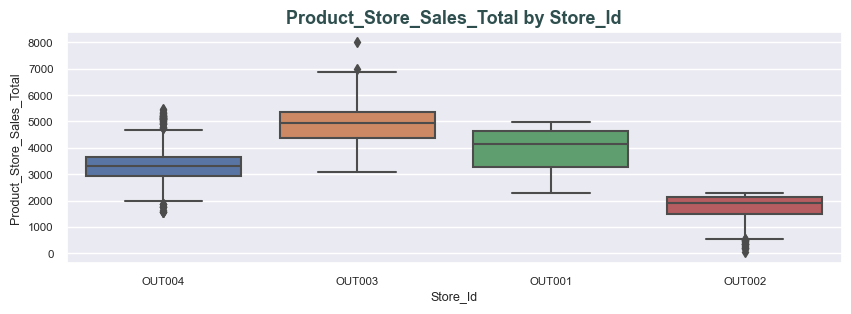

In [50]:
# Plot the boxplot of Store size against Product_Store_Sales_Total 
custom_boxplot(data.Store_Id, data.Product_Store_Sales_Total)

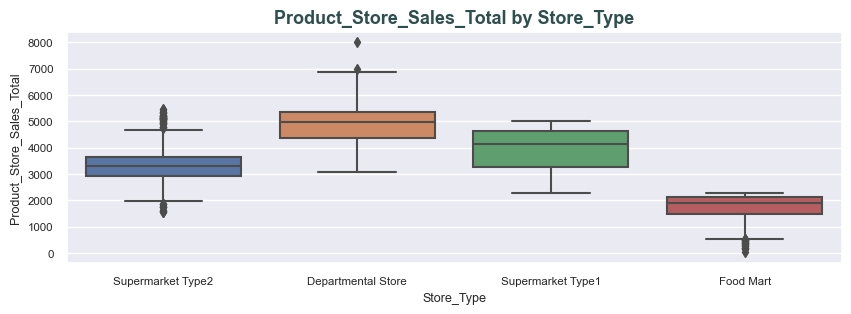

In [51]:
# Plot the boxplot of Store type against Product_Store_Sales_Total 
custom_boxplot(data.Store_Type, data.Product_Store_Sales_Total)

**Observation:**
    
- Although the number of products bought from OUT003 is around 15% only, however more costly goods have been bought from this store than the other stores. This shows that this is a premium store for the company. 
- From the store OUT002 the low cost goods have been bought than the other stores. This store has less contribution to the company.
- Store_Id and Store_Type shows the same behavior.

**Let's now try to find out some relationship between the other columns**

**Generally certain product types will have higher product weight than others. Let's have a look**

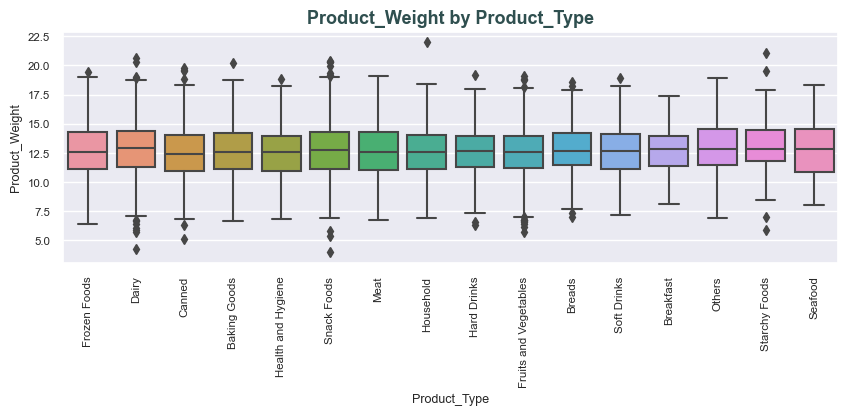

In [52]:
# Plot the boxplot of Product_Type against Product_Weight 
custom_boxplot(data.Product_Type, data.Product_Weight, rotation=90)

**Observations:**

- The median weight of all the product types is almost equal. Each product type contains different items whose weight ranges from low to high, therefore the overall weight of the product category gets averaged out.

**Let's find out whether there is some relationship between the weight of the product and its sugar content**

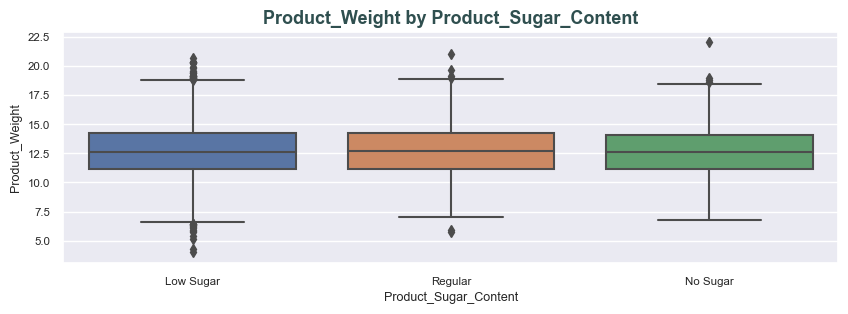

In [53]:
# Plot the box plot of Product_Sugar_Content against Product_Weight 
custom_boxplot(data.Product_Sugar_Content, data.Product_Weight)

**Observations:**

- The median weight of all the products across the 3 categories is almost the same.

In [54]:
# custom heatmap labelled
def heatmap_crosstab(df, feature_x, feature_y, cmap="viridis", title=None, figsize=(10, 3)):
    """Custom heatmap of df.
    df: DataFrame.
    feature_x: Name of feature_x
    feature_y: Name of feature_y
    title: Title of the plot.
    figsize: Figsize of the plot. Default (6,3).
    """
    if not title: title=f'{feature_x} vs {feature_y}'
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.75)
    sns.heatmap(pd.crosstab(df[feature_x], df[feature_y]), annot=True, fmt="g", cmap=cmap)
    plt.title(title, **suptitle_param)
    plt.ylabel(feature_x)
    plt.xlabel(feature_y)
    plt.show()
    plt.style.use('default')

**Let's analyze the sugar content of different product types**

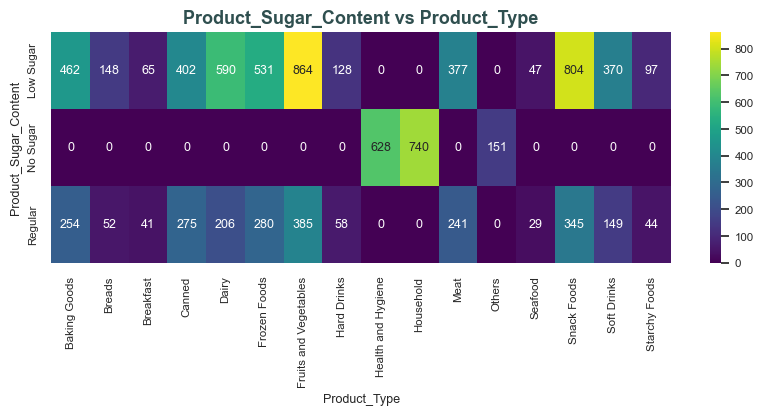

In [55]:
# Plot heatmap with and Product_Type as x and Product_Sugar_Content as y
heatmap_crosstab(data, 'Product_Sugar_Content', 'Product_Type')

**Observation:**
    
- Health and hygiene, household, and others are the only categories that have no sugar in them.

#### Let's find out how many items of each product type has been sold in each of the stores

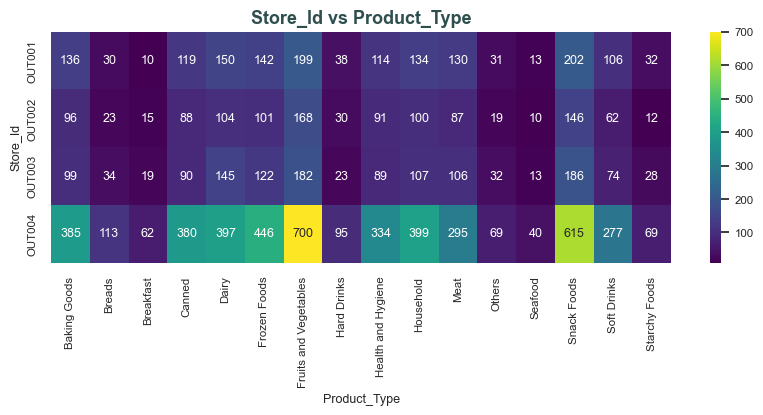

In [56]:
# Plot heatmap with and Product_Type as x and Store_Ids as y
heatmap_crosstab(data, 'Store_Id', 'Product_Type')

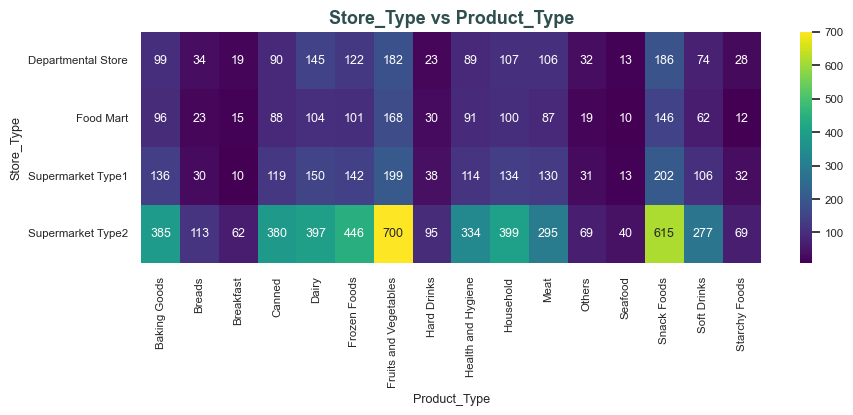

In [57]:
# Plot heatmap with and Product_Type as x and Store_Type as y
heatmap_crosstab(data, 'Store_Type', 'Product_Type')

**Observations:**

- Fruits and vegetables have been sold the most across all the stores followed by snack foods.
- Seafood is the least bought product type across all the stores.
- Store_Type and Store_Id show the same values.

#### Different product types have different prices. Let's analyze the trend

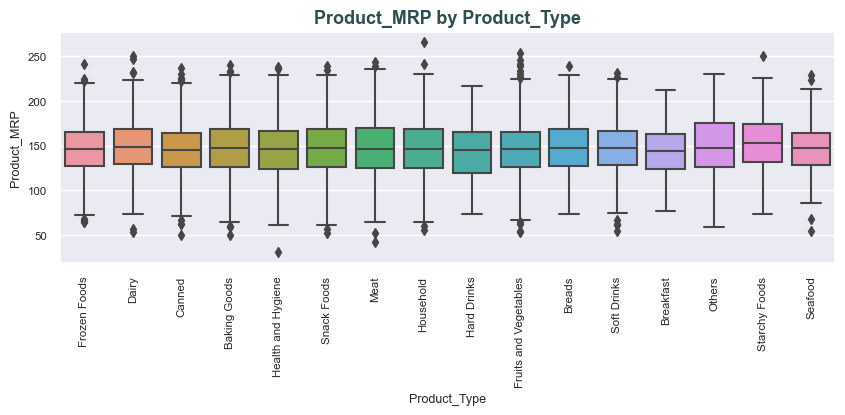

In [58]:
# Plot a box plot of Product_Type against Product_MRP
custom_boxplot(data.Product_Type, data.Product_MRP, rotation=90)

**Observations:**

- The median MRPs of all the product types are almost equal. Each product type contains different items whose price ranges from low to high, therefore, the overall MRP of the product category gets averaged out.

#### Let's find out how the Product_MRP varies with the different stores

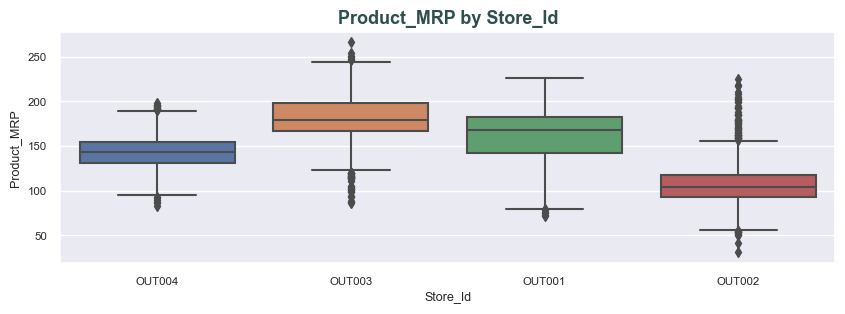

In [59]:
# Plot a box plot of box plot of Store_Id against Product_MRP
custom_boxplot(data.Store_Id, data.Product_MRP)

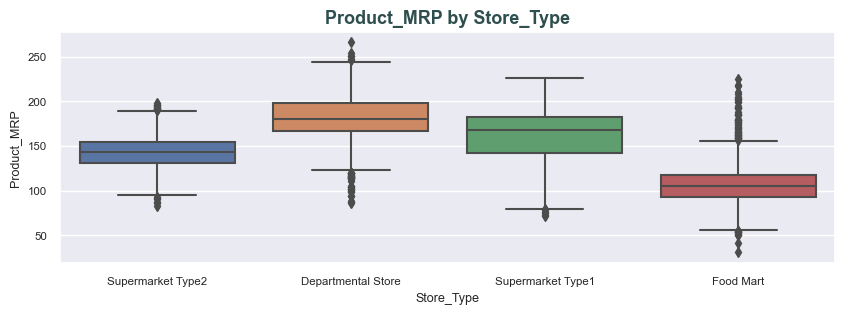

In [60]:
# Plot a box plot of box plot of Store_Id against Product_MRP
custom_boxplot(data.Store_Type, data.Product_MRP)

**Observations:**

- As we have seen earlier OUT003, being a premium store, has more costly items than the rest of the stores.
- Store_Id and Store_Type shows the same values.

**Let's delve deeper and do a detailed analysis of each of the stores**

## OUT001

In [61]:
data.loc[data["Store_Id"] == "OUT001"].describe(include = "all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1586.0,NaN,NaN,NaN,13.458865,2.064975,6.16,12.0525,13.96,14.95,17.97
Product_Sugar_Content,1586,3,Low Sugar,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1586.0,NaN,NaN,NaN,0.068768,0.047131,0.004,0.033,0.0565,0.094,0.295
Product_Type,1586,16,Snack Foods,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1586.0,NaN,NaN,NaN,160.514054,30.359059,71.35,141.72,168.32,182.9375,226.59
Store_Id,1586,1,OUT001,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1586.0,NaN,NaN,NaN,1987.0,0.0,1987.0,1987.0,1987.0,1987.0,1987.0
Store_Size,1586,1,High,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1586,1,Tier 2,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1586,1,Supermarket Type1,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
    
- OUT001 is a store of Supermarket Type 1 which is located in a Tier 2 city and has a store size as high. It was established in 1987.
- OUT001 has sold products whose MRP ranges from 71 to 227.
- Snack Foods have been sold the highest number of times in OUT001.
- The revenue generated from each product at OUT001 ranges from 2300 to 5000.
- The Product_Type has more unique values when compared to other variables considered.

In [62]:
print(f'{data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum():,.2f}')

6,223,113.18


In [63]:
df_OUT001 = (data.loc[data["Store_Id"] == "OUT001"]
             .groupby(["Product_Type"])["Product_Store_Sales_Total"]
             .sum())
df_OUT001

Product_Type
Baking Goods             525131.04
Breads                   121274.09
Breakfast                 38161.10
Canned                   449016.38
Dairy                    598767.62
Frozen Foods             558556.81
Fruits and Vegetables    792992.59
Hard Drinks              152920.74
Health and Hygiene       435005.31
Household                531371.38
Meat                     505867.28
Others                   123977.09
Seafood                   52936.84
Snack Foods              806142.24
Soft Drinks              410548.69
Starchy Foods            120443.98
Name: Product_Store_Sales_Total, dtype: float64

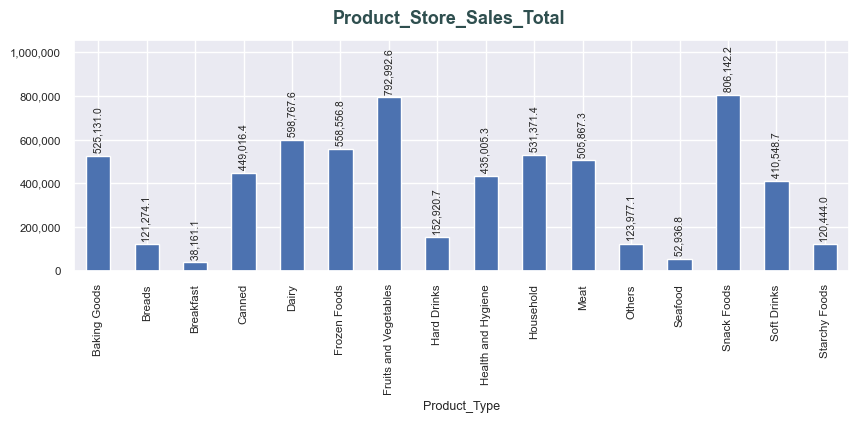

In [64]:
custom_barplot(df_OUT001, rotation=90, label_rotation=90, figsize=(10,3))

**Observations:**

- OUT001 has generated the highest revenue from the sale of fruits and vegetables and snack foods. Both the categories have contributed around 800000 each.
- OUT001 has generated the lowest revenue from the sale of breakfast and seafood. Both the categories have contributed 500000 each.

## OUT002

In [65]:
# Print the statistical summary where Store_Id is OUT002
data.loc[data["Store_Id"] == "OUT002"].describe(include = "all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1152.0,NaN,NaN,NaN,9.911241,1.799846,4.0,8.7675,9.795,10.89,19.82
Product_Sugar_Content,1152,3,Low Sugar,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1152.0,NaN,NaN,NaN,0.067747,0.047567,0.006,0.031,0.0545,0.09525,0.292
Product_Type,1152,16,Fruits and Vegetables,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1152.0,NaN,NaN,NaN,107.080634,24.912333,31.0,92.8275,104.675,117.8175,224.93
Store_Id,1152,1,OUT002,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1152.0,NaN,NaN,NaN,1998.0,0.0,1998.0,1998.0,1998.0,1998.0,1998.0
Store_Size,1152,1,Small,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1152,1,Tier 3,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1152,1,Food Mart,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
    
- OUT002 is a food mart which is located in a Tier 3 city and has store size as small. It was established in 1998.
- OUT002 has sold products whose MRP ranges from 31 to 225.
- Fruits and vegetables have been sold the highest number of times in OUT002.
- The revenue generated from each product at OUT002 ranges from 33 to 2300.
- The frequency of each variable ranges from 168 to 1152.

In [66]:
# Print the total revenue from the OUT002 Store_Id 
print(f'{data.loc[data["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum():,.2f}')

2,030,909.72


In [67]:
df_OUT002 = (data.loc[data["Store_Id"] == "OUT002"]
             .groupby(["Product_Type"])["Product_Store_Sales_Total"]
             .sum())
df_OUT002

Product_Type
Baking Goods             169860.50
Breads                    43419.47
Breakfast                 23396.10
Canned                   151467.66
Dairy                    178888.18
Frozen Foods             180295.95
Fruits and Vegetables    298503.56
Hard Drinks               54281.85
Health and Hygiene       164660.81
Household                184665.65
Meat                     151800.01
Others                    32835.73
Seafood                   17663.35
Snack Foods              255317.57
Soft Drinks              103808.35
Starchy Foods             20044.98
Name: Product_Store_Sales_Total, dtype: float64

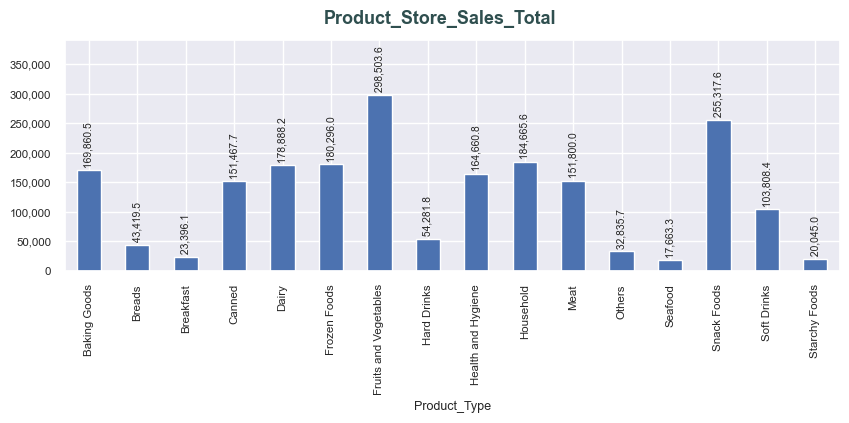

In [68]:
# Plot the barplot for Product_Type from df_OUT002 against Product_Store_Sales_Total
custom_barplot(df_OUT002, rotation=90, label_rotation=90, figsize=(10,3))

**Observations:**

- OUT002 has generated the highest revenue from the sale of fruits and vegetables (~ 300000) followed by snack foods (~ 250000).
- OUT002 has generated the lowest revenue from the sale of seafood and starchy foods followed by breakfast.

## OUT003

In [69]:
# Print the statistical summary where Store_Id is OUT003
data.loc[data["Store_Id"] == "OUT003"].describe(include = "all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1349.0,NaN,NaN,NaN,15.103692,1.893531,7.35,14.02,15.18,16.35,22.0
Product_Sugar_Content,1349,3,Low Sugar,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1349.0,NaN,NaN,NaN,0.068637,0.048708,0.004,0.031,0.057,0.094,0.298
Product_Type,1349,16,Snack Foods,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1349.0,NaN,NaN,NaN,181.358725,24.796429,85.88,166.92,179.67,198.07,266.0
Store_Id,1349,1,OUT003,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1349.0,NaN,NaN,NaN,1999.0,0.0,1999.0,1999.0,1999.0,1999.0,1999.0
Store_Size,1349,1,Medium,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1349,1,Tier 1,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1349,1,Departmental Store,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**

- OUT003 is a Departmental store which is located in a Tier 1 city and has a store size of medium. It was established in 1999.
- OUT003 has sold products whose MRP ranges from 86 to 266.
- Snack Foods have been sold the highest number of times in OUT003.
- The revenue generated from each product at OUT003 ranges from 3070 to 8000.
- The frequency of all the variables is in the range of 186 to 1349.

In [70]:
# Print the total revenue from the OUT003 Store_Id 
print(f'{data.loc[data["Store_Id"] == "OUT003", "Product_Store_Sales_Total"].sum():,.2f}')

6,673,457.57


In [71]:
df_OUT003 = (data.loc[data["Store_Id"] == "OUT003"]
             .groupby(["Product_Type"])["Product_Store_Sales_Total"]
             .sum())
df_OUT003

Product_Type
Baking Goods             491908.20
Breads                   175391.93
Breakfast                 95634.08
Canned                   452445.17
Dairy                    715814.94
Frozen Foods             597608.42
Fruits and Vegetables    897437.46
Hard Drinks              110760.30
Health and Hygiene       439139.18
Household                523981.64
Meat                     520939.68
Others                   159963.75
Seafood                   65337.48
Snack Foods              918510.44
Soft Drinks              365046.30
Starchy Foods            143538.60
Name: Product_Store_Sales_Total, dtype: float64

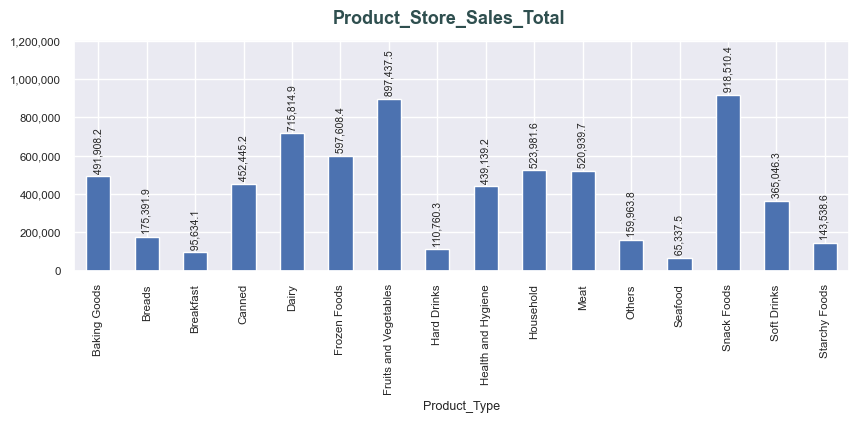

In [72]:
# Plot the barplot for Product_Type from df_OUT003 against Product_Store_Sales_Total
custom_barplot(df_OUT003, rotation=90, label_rotation=90, figsize=(10,3))

**Observation:**

- OUT003 has generated the highest revenue from the sale of snack foods followed by fruits and vegetables, both categories contributing around 800000 each.

## OUT004

In [73]:
# Print the statistical summary where Store_Id is OUT004
data.loc[data["Store_Id"] == "OUT004"].describe(include = "all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,4676.0,NaN,NaN,NaN,12.349613,1.428199,7.34,11.37,12.37,13.3025,17.79
Product_Sugar_Content,4676,3,Low Sugar,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,4676.0,NaN,NaN,NaN,0.069092,0.048584,0.004,0.031,0.056,0.097,0.297
Product_Type,4676,16,Fruits and Vegetables,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,4676.0,NaN,NaN,NaN,142.399709,17.513973,83.04,130.54,142.82,154.1925,197.66
Store_Id,4676,1,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,4676.0,NaN,NaN,NaN,2009.0,0.0,2009.0,2009.0,2009.0,2009.0,2009.0
Store_Size,4676,1,Medium,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,4676,1,Tier 2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,4676,1,Supermarket Type2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
    
- OUT004 is a store of Supermarket Type2 which is located in a Tier 2 city and has store size as medium. It was established in 2009.
- OUT004 has sold products whose MRP range from 83 to 198.
- Fruits and vegetables have been sold the highest number of times in OUT004.
- The revenue generated from each product at OUT004 ranges from 1561 to 5463.
- The frequency of all the variables in OUT004 is in the range from 700 to 4676.

In [74]:
# Print the total revenue from the OUT004 Store_Id 
print(f'{data.loc[data["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum():,.2f}')

15,427,583.43


In [75]:
df_OUT004 = (data.loc[data["Store_Id"] == "OUT004"]
             .groupby(["Product_Type"])["Product_Store_Sales_Total"]
             .sum())
df_OUT004

Product_Type
Baking Goods             1266086.26
Breads                    374856.75
Breakfast                 204939.13
Canned                   1247153.50
Dairy                    1318447.30
Frozen Foods             1473519.65
Fruits and Vegetables    2311899.66
Hard Drinks               307851.73
Health and Hygiene       1124901.91
Household                1324721.50
Meat                      950604.97
Others                    224719.73
Seafood                   136466.37
Snack Foods              2009026.70
Soft Drinks               917641.38
Starchy Foods             234746.89
Name: Product_Store_Sales_Total, dtype: float64

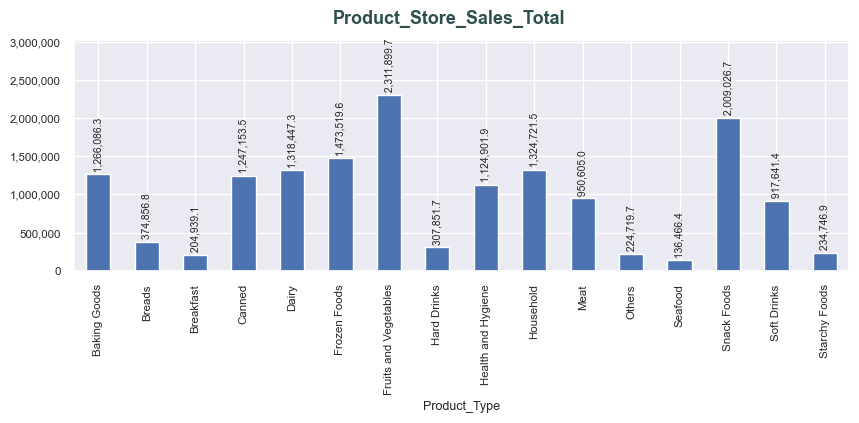

In [76]:
# Plot the barplot for Product_Type from df_OUT004 against Product_Store_Sales_Total
custom_barplot(df_OUT004, rotation=90, label_rotation=90, figsize=(10,3))

**Observations:**

- OUT004 has generated the highest revenue from the sale of fruits and vegetables (~ 2500000) followed by snack foods (~ 2000000).

#### Let's find out the revenue generated by the stores from each of the product types

In [77]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum().sort_values('Product_Store_Sales_Total', ascending=False)
df1

,Product_Type,Store_Id,Product_Store_Sales_Total
27,Fruits and Vegetables,OUT004,2311899.66
55,Snack Foods,OUT004,2009026.70
23,Frozen Foods,OUT004,1473519.65
39,Household,OUT004,1324721.50
19,Dairy,OUT004,1318447.30
3,Baking Goods,OUT004,1266086.26
15,Canned,OUT004,1247153.50
35,Health and Hygiene,OUT004,1124901.91
43,Meat,OUT004,950604.97
54,Snack Foods,OUT003,918510.44


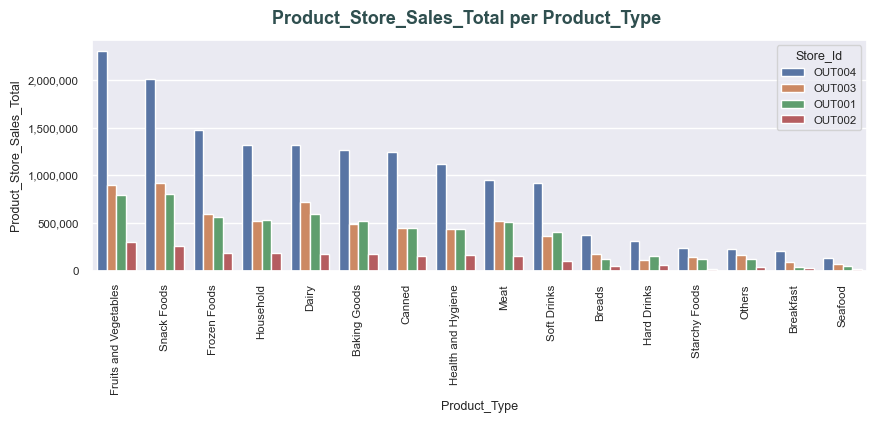

In [78]:
custom_3var_barplot(df1, 'Product_Type', 'Product_Store_Sales_Total', 'Store_Id', 
                    label_visible=False, rotation=90, label_rotation=90)

In [79]:
# Getting the percent of revenue in each store per product type
pd.crosstab(index=data.Store_Id, 
            columns=data.Product_Type, 
            values=data.Product_Store_Sales_Total, 
            aggfunc=sum).apply(
    lambda x: [np.round(i/data[data.Product_Type == x.name].Product_Store_Sales_Total.sum()*100, 2) for i in x])

Product_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Store_Id,,,,,,,,,,,,,,,,
OUT001,21.41,16.96,10.54,19.52,21.29,19.88,18.44,24.44,20.10,20.72,23.76,22.90,19.43,20.21,22.85,23.22
OUT002,6.92,6.07,6.46,6.59,6.36,6.42,6.94,8.67,7.61,7.20,7.13,6.06,6.48,6.40,5.78,3.86
OUT003,20.05,24.53,26.41,19.67,25.46,21.27,20.87,17.70,20.30,20.43,24.47,29.54,23.99,23.03,20.31,27.67
OUT004,51.61,52.43,56.59,54.22,46.89,52.44,53.75,49.19,51.99,51.65,44.65,41.50,50.10,50.36,51.06,45.25


**Observations:**

- In all the product types, the revenue generated by OUT004 has been the highest which seems quite logical since around 53% of the total products were brought from this store.
- In all the product categories, the revenue generated by OUT002 has been the lowest which seems quite obvious since it is a small store in a Tier 3 city.
- In all the product types, the revenue generated by OUT004 is three times that of OUT003.

#### Let's find out the revenue generated by the stores from products having different levels of sugar content

In [80]:
df2 = data.groupby(["Product_Sugar_Content", "Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum().sort_values('Product_Store_Sales_Total', ascending=False)

df2

,Product_Sugar_Content,Store_Id,Product_Store_Sales_Total
3,Low Sugar,OUT004,8658908.78
11,Regular,OUT004,4094331.51
2,Low Sugar,OUT003,3706903.24
0,Low Sugar,OUT001,3300834.93
7,No Sugar,OUT004,2674343.14
10,Regular,OUT003,1843469.76
8,Regular,OUT001,1831924.47
1,Low Sugar,OUT002,1156758.85
6,No Sugar,OUT003,1123084.57
4,No Sugar,OUT001,1090353.78


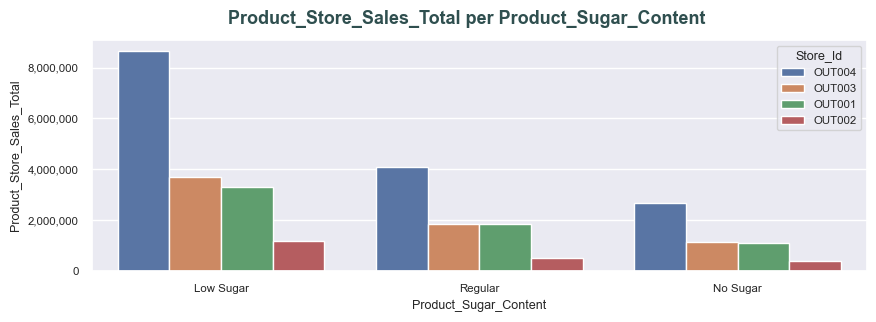

In [81]:
custom_3var_barplot(df2, 'Product_Sugar_Content', 'Product_Store_Sales_Total', 'Store_Id', label_visible=False)

In [82]:
# Getting the percent of revenue in each store per product type
pd.crosstab(index=data.Store_Id, 
            columns=data.Product_Sugar_Content, 
            values=data.Product_Store_Sales_Total, 
            aggfunc=sum).apply(
    lambda x: [np.round(i/data[data.Product_Sugar_Content == x.name].Product_Store_Sales_Total.sum()*100, 2) for i in x])

Product_Sugar_Content,Low Sugar,No Sugar,Regular
Store_Id,,,
OUT001,19.62,20.69,22.17
OUT002,6.88,7.25,5.96
OUT003,22.03,21.31,22.31
OUT004,51.47,50.75,49.56


**Observations:**

- The trend is the same as that which was present in the revenue analysis of stores for product types.

## **Data Preprocessing**

### **Feature Engineering**

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.(The data of the sales records was collected in 2021, so we will use 2021 as the base year to calculate the store age)**

In [83]:
# Outlet Age
data["Store_Age_Years"] = 2021 - data.Store_Establishment_Year 
data["Store_Age_Years"].unique()

array([12, 22, 34, 23], dtype=int64)

In [84]:
data.Product_Type.unique(), len(data.Product_Type.unique())

(array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods',
        'Health and Hygiene', 'Snack Foods', 'Meat', 'Household',
        'Hard Drinks', 'Fruits and Vegetables', 'Breads', 'Soft Drinks',
        'Breakfast', 'Others', 'Starchy Foods', 'Seafood'], dtype=object),
 16)

**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [85]:
perishables = ["Dairy", "Meat", "Fruits and Vegetables", "Breakfast", "Breads", "Seafood", ]
data["Product_Type_Category"] = data.Product_Type.apply(lambda x: 'Perishables' if x in perishables else 'Non Perishables')
data.Product_Type_Category

0       Non Perishables
1           Perishables
2       Non Perishables
3       Non Perishables
4       Non Perishables
             ...       
8758    Non Perishables
8759    Non Perishables
8760    Non Perishables
8761    Non Perishables
8762    Non Perishables
Name: Product_Type_Category, Length: 8763, dtype: object

In [86]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,12,Non Perishables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,22,Perishables
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,34,Non Perishables
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,34,Non Perishables
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,23,Non Perishables


### **Outlier Check**

- Let's check for outliers in the data.

In [87]:
# Define a funtion to show all the numerical variables in boxplot
def df_boxplot(df, figsize=(10, 3)):
    """Visualize the five-number summary of all numerical variables in dataset: minimum, 
    first quartile (Q1), median (Q2), third quartile (Q3), and maximum.
    df: dataframe.
    size of fig (default (10, 3))
    """
    sns.set(font_scale=.5)
    axes = df.plot(kind='box', subplots=True, sharey=False, fontsize=6, figsize=figsize)
    for ax in axes:
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.suptitle('Numerical variables', **suptitle_param)
    plt.subplots_adjust(wspace=0.75) 
    plt.show()
    plt.style.use('default')

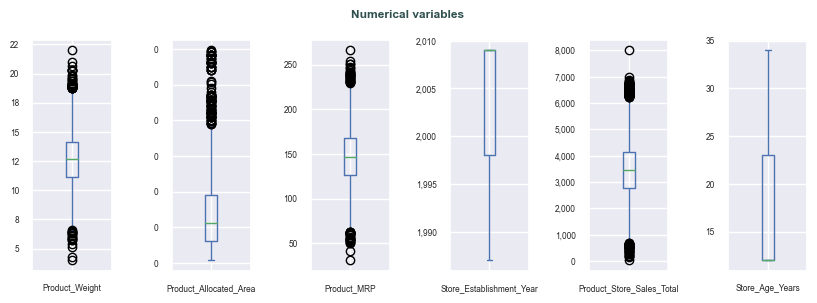

In [88]:
# Outlier detection using boxplot
df_boxplot(data)

**Observations:**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

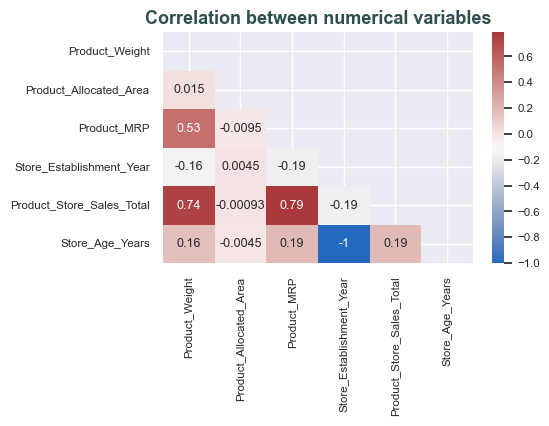

In [89]:
correlation_plot(data)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Weight             8763 non-null   float64
 1   Product_Sugar_Content      8763 non-null   object 
 2   Product_Allocated_Area     8763 non-null   float64
 3   Product_Type               8763 non-null   object 
 4   Product_MRP                8763 non-null   float64
 5   Store_Id                   8763 non-null   object 
 6   Store_Establishment_Year   8763 non-null   int64  
 7   Store_Size                 8763 non-null   object 
 8   Store_Location_City_Type   8763 non-null   object 
 9   Store_Type                 8763 non-null   object 
 10  Product_Store_Sales_Total  8763 non-null   float64
 11  Product_Id_char            8763 non-null   object 
 12  Store_Age_Years            8763 non-null   int64  
 13  Product_Type_Category      8763 non-null   objec

In [91]:
data.select_dtypes(include=object).columns

Index(['Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size',
       'Store_Location_City_Type', 'Store_Type', 'Product_Id_char',
       'Product_Type_Category'],
      dtype='object')

In [92]:
# Using association_metrics library
import association_metrics as am

# Convert object columns to Category columns
df_catego = data.apply(lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CramersV object using the pandas.DataFrame (df)
cramers_v = am.CramersV(df_catego)

# It will return a pairwise matrix filled with Cramer's V, where 
# columns and index are the categorical variables of the passed     # pandas.DataFrame
cfit = cramers_v.fit().round(4)
cfit

,Product_Sugar_Content,Product_Type,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Id_char,Product_Type_Category
Product_Sugar_Content,1.0000,0.7104,0.0222,0.0216,0.0146,0.0222,0.7073,0.3348
Product_Type,0.7104,1.0000,0.0451,0.0405,0.0402,0.0451,1.0000,1.0000
Store_Id,0.0222,0.0451,1.0000,1.0000,1.0000,1.0000,0.0169,0.0226
Store_Size,0.0216,0.0405,1.0000,1.0000,0.7269,1.0000,0.0153,0.0122
Store_Location_City_Type,0.0146,0.0402,1.0000,0.7269,1.0000,1.0000,0.0123,0.0217
Store_Type,0.0222,0.0451,1.0000,1.0000,1.0000,1.0000,0.0169,0.0226
Product_Id_char,0.7073,1.0000,0.0169,0.0153,0.0123,0.0169,1.0000,0.4256
Product_Type_Category,0.3348,1.0000,0.0226,0.0122,0.0217,0.0226,0.4256,1.0000


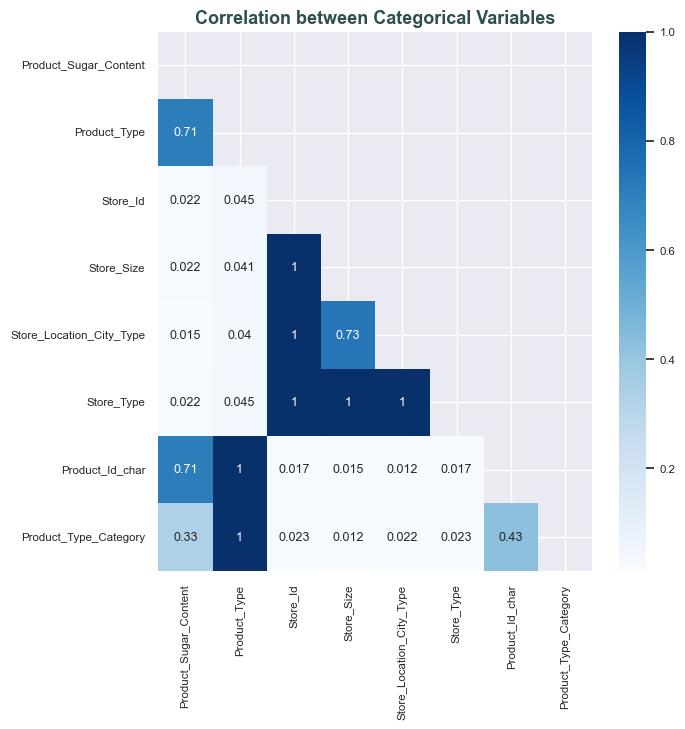

In [93]:
mask = np.zeros_like(cfit, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# correlation_plot
sns.set(font_scale=0.75)
plt.figure(figsize=(7, 7))
sns.heatmap(cfit, annot=True, mask=mask, cmap='Blues')
plt.title('Correlation between Categorical Variables', **suptitle_param)
plt.show()
plt.style.use('default')

In [94]:
# df3 = pd.get_dummies(data, columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(), drop_first = True)
# correlation_plot(df3, figsize=(30,30), cbar_kws={'shrink':0.3})

**Observations:**

- We observe high positive correlation in the following relation:
    - Product Type with Product Sugar (0.71)
    - Store Location City Type with Store Size (0.73)
    - Product Id Char with Product Sugar Content (0.71)

- We observe a perfect correlation in the following relation:
    - Store Id with Store Type, Store Location City Type, and Store Size.
    - Product Type with Product Id Char, and Product Type Category.
    - Store Type with Store Size and Store Location City Type.

### **Data Preparation for modeling**

- We want to forecast the Product_Store_Sales_Total. 
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [95]:
data.head(2)

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,12,Non Perishables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,22,Perishables


In [96]:
# Drop the "Product_Type" as we have "Product_Type_Category"
# Drop "Store_Id" as we have the same data in "Store Type"
# Drop "Store_Establishment_Year" as we have Store Age Years
data = data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis=1)

In [97]:
# Apply get_dummies on the dataframe data
data = pd.get_dummies(data, 
                      columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(), 
                      drop_first = True)
data.head(2)

,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Store_Sales_Total,Store_Age_Years,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Id_char_FD,Product_Id_char_NC,Product_Type_Category_Perishables
0,12.66,0.027,117.08,2842.40,12,0,0,1,0,1,0,0,0,1,1,0,0
1,16.54,0.144,171.43,4830.02,22,0,0,1,0,0,0,0,0,0,1,0,1


In [98]:
# Separating features and the target column
X = data.drop(['Product_Store_Sales_Total'], axis=1)
y = data.Product_Store_Sales_Total

In [99]:
X = sm.add_constant(X)

In [100]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [101]:
X_train.shape, X_test.shape

((6134, 17), (2629, 17))

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    np.seterr(divide='ignore', invalid='ignore')
    VIF = pd.Series([variance_inflation_factor(train.values, i) 
                     for i in range(train.shape[1])],
                    index = train.columns,
                    dtype = float).to_frame('VIF')
    _ = np.seterr(divide='warn', invalid='warn')
    # VIF.replace([np.inf, -np.inf], np.nan, inplace=True)
    # VIF.dropna(inplace=True)
    return VIF

checking_vif(X_train)

,VIF
const,0.000000
Product_Weight,1.752928
Product_Allocated_Area,1.001184
Product_MRP,1.885058
Store_Age_Years,inf
Product_Sugar_Content_No Sugar,inf
Product_Sugar_Content_Regular,1.088506
Store_Size_Medium,inf
Store_Size_Small,inf
Store_Location_City_Type_Tier 2,inf


[VIF function returns 'inf' values](https://stackoverflow.com/questions/60163405/vif-function-returns-all-inf-values)

This shows a perfect correlation between two independent variables. In the case of perfect correlation, we get $ R^2 = 1 $, which lead to $ \frac{1}{(1 - R^2)} $ infinity. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.

Let's explore p-values.

In [103]:
# sm.OLS(y_train, X_train).fit().pvalues.to_frame('p-value').style.format("{:.12f}")

**Observations:**
- The VIF of Product_Weight, Product_Allocation_Area, Product_MRP, Product_Id_char_FD are less.

In [104]:
# X_train = X_train.drop('Store_Age_Years',axis = 1)

# X_test = X_test.drop('Store_Age_Years',axis = 1)

## **Building Models**

Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly. 

In [105]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [106]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit()

In [107]:
# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     2860.
Date:                       Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                               19:19:52   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.229e+04
Df Residuals:                           6123   BIC:                         9.236e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -97.3332      8.817    -11.040      0.000    -114.617     -80.049
Product_Weight                      135.0943      3.436     39.318      0.000     128.359     141.830
Product_Allocated_Area             -139.5679    118.876     -1.174      0.240    -372.608      93.472
Product_MRP                          12.8696      0.254     50.702      0.000      12.372      13.367
Store_Age_Years                      14.7633      1.870      7.897      0.000      11.098      18.428
Product_Sugar_Content_No Sugar       16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Sugar_Content_Regular        30.8608     13.284      2.323      0.020       4.819      56.902
Store_Size_Medium                   343.5434     20.537     16.728      0.000     303.283     383.804
Store_Size_Small                   -405.0446      6.246    -64.846      0.000    -417.290    -392.800
Store_Location_City_Type_Tier 2    -334.9443      9.057    -36.982      0.000    -352.699    -317.189
Store_Location_City_Type_Tier 3    -405.0446      6.246    -64.846      0.000    -417.290    -392.800
Store_Type_Food Mart               -405.0446      6.246    -64.846      0.000    -417.290    -392.800
Store_Type_Supermarket Type1        -35.8320     10.178     -3.520      0.000     -55.785     -15.879
Store_Type_Supermarket Type2       -299.1123      9.365    -31.939      0.000    -317.471    -280.753
Product_Id_char_FD                    0.3932     21.936      0.018      0.986     -42.609      43.396
Product_Id_char_NC                   16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Type_Category_Perishables     7.7111     13.233      0.583      0.560     -18.231      33.653
==============================================================================
Omnibus:                     1745.262   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46497.082
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      16.399   Cond. No.                     1.03e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [108]:
# Checking model1 performance
model_pref(model1, X_train, X_test)

    Data        RMSE         MAE        r2
0  Train  446.667654  262.110666  0.785927
1   Test  446.685287  266.690587  0.790208


**Observations:**

- The Train and the Test scores are very close to each other so we can say the model is not overfitting.
- However, the Test score is slightly better than the Train score. So, we might be able to get better performance if we increase the complexity of the model.

### **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [109]:
# Drop the insiginificant variables from the X_train 
X_train1 = X_train.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1)

In [110]:
# Please drop the insiginificant variables from the X_test
X_test1 = X_test.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1)

In [111]:
# Create the OLS model and fit it
model2 = sm.OLS(y_train, X_train1).fit()

In [112]:
# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     3576.
Date:                       Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                               19:19:52   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.228e+04
Df Residuals:                           6125   BIC:                         9.234e+04
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -96.7056      8.239    -11.737      0.000    -112.857     -80.554
Product_Weight                    135.0918      3.435     39.323      0.000     128.357     141.827
Product_Allocated_Area           -140.3752    118.852     -1.181      0.238    -373.367      92.616
Product_MRP                        12.8703      0.254     50.727      0.000      12.373      13.368
Store_Age_Years                    14.8620      1.808      8.220      0.000      11.317      18.407
Product_Sugar_Content_No Sugar     14.1944      7.933      1.789      0.074      -1.358      29.747
Product_Sugar_Content_Regular      30.7219     13.272      2.315      0.021       4.704      56.740
Store_Size_Medium                 344.4828     20.044     17.186      0.000     305.189     383.777
Store_Size_Small                 -404.7772      6.096    -66.403      0.000    -416.727    -392.827
Store_Location_City_Type_Tier 2  -334.8208      8.989    -37.246      0.000    -352.443    -317.199
Store_Location_City_Type_Tier 3  -404.7772      6.096    -66.403      0.000    -416.727    -392.827
Store_Type_Food Mart             -404.7772      6.096    -66.403      0.000    -416.727    -392.827
Store_Type_Supermarket Type1      -36.4112      9.817     -3.709      0.000     -55.656     -17.167
Store_Type_Supermarket Type2     -298.4096      8.573    -34.810      0.000    -315.215    -281.604
Product_Id_char_NC                 14.1944      7.933      1.789      0.074      -1.358      29.747
==============================================================================
Omnibus:                     1744.629   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46526.548
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      16.403   Cond. No.                     1.44e+34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.82e-61. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [113]:
# Checking model2 performance
model_pref(model2, X_train1, X_test1)

    Data        RMSE         MAE        r2
0  Train  446.681336  262.125308  0.785911
1   Test  446.780252  266.790089  0.790113


### **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [114]:
# Drop the insiginificant variables from the X_train 
X_train2 = X_train1.drop(["Product_Allocated_Area"], axis = 1)

In [115]:
# Please drop the insiginificant variables from the X_test
X_test2 = X_test1.drop(["Product_Allocated_Area"], axis = 1)

In [116]:
# Create the OLS model and fit it
model3 = sm.OLS(y_train, X_train2).fit()

In [117]:
# Get the model summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     4087.
Date:                       Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                               19:19:52   Log-Likelihood:                -46133.
No. Observations:                       6134   AIC:                         9.228e+04
Df Residuals:                           6126   BIC:                         9.234e+04
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -98.3300      8.124    -12.104      0.000    -114.255     -82.405
Product_Weight                    135.0263      3.435     39.307      0.000     128.292     141.760
Product_MRP                        12.8742      0.254     50.745      0.000      12.377      13.372
Store_Age_Years                    14.6146      1.796      8.137      0.000      11.094      18.135
Product_Sugar_Content_No Sugar     14.1784      7.934      1.787      0.074      -1.374      29.731
Product_Sugar_Content_Regular      31.0462     13.270      2.340      0.019       5.033      57.060
Store_Size_Medium                 342.2322     19.954     17.151      0.000     303.115     381.350
Store_Size_Small                 -405.4821      6.067    -66.838      0.000    -417.375    -393.589
Store_Location_City_Type_Tier 2  -335.5118      8.971    -37.401      0.000    -353.097    -317.926
Store_Location_City_Type_Tier 3  -405.4821      6.067    -66.838      0.000    -417.375    -393.589
Store_Type_Food Mart             -405.4821      6.067    -66.838      0.000    -417.375    -393.589
Store_Type_Supermarket Type1      -35.0801      9.752     -3.597      0.000     -54.198     -15.962
Store_Type_Supermarket Type2     -300.4317      8.400    -35.765      0.000    -316.899    -283.965
Product_Id_char_NC                 14.1784      7.934      1.787      0.074      -1.374      29.731
==============================================================================
Omnibus:                     1745.019   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46595.866
Skew:                           0.774   Prob(JB):                         0.00
Kurtosis:                      16.413   Cond. No.                     3.99e+34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.86e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [118]:
# Checking model3 performance
model_pref(model3, X_train2, X_test2)

    Data        RMSE         MAE        r2
0  Train  446.732199  262.174431  0.785852
1   Test  446.667762  266.581948  0.790275


### **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [119]:
# Drop the insiginificant variables from the X_train 
X_train3 = X_train2.drop(["Product_Sugar_Content_No Sugar", "Product_Id_char_NC"], axis = 1)

In [120]:
# Please drop the insiginificant variables from the X_test
X_test3 = X_test2.drop(["Product_Sugar_Content_No Sugar", "Product_Id_char_NC"], axis = 1)

In [121]:
# Create the OLS model and fit it
model4 = sm.OLS(y_train, X_train3).fit()

In [122]:
# Get the model summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     4765.
Date:                       Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                               19:19:52   Log-Likelihood:                -46135.
No. Observations:                       6134   AIC:                         9.228e+04
Df Residuals:                           6127   BIC:                         9.233e+04
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -97.1094      8.096    -11.994      0.000    -112.981     -81.238
Product_Weight                    134.9413      3.435     39.279      0.000     128.207     141.676
Product_MRP                        12.8757      0.254     50.742      0.000      12.378      13.373
Store_Age_Years                    14.8188      1.793      8.266      0.000      11.305      18.333
Product_Sugar_Content_Regular      24.4006     12.740      1.915      0.056      -0.575      49.376
Store_Size_Medium                 343.9348     19.935     17.253      0.000     304.855     383.015
Store_Size_Small                 -404.9765      6.061    -66.815      0.000    -416.858    -393.094
Store_Location_City_Type_Tier 2  -334.9692      8.967    -37.356      0.000    -352.548    -317.391
Store_Location_City_Type_Tier 3  -404.9765      6.061    -66.815      0.000    -416.858    -393.094
Store_Type_Food Mart             -404.9765      6.061    -66.815      0.000    -416.858    -393.094
Store_Type_Supermarket Type1      -36.0677      9.738     -3.704      0.000     -55.158     -16.977
Store_Type_Supermarket Type2     -298.9014      8.358    -35.763      0.000    -315.286    -282.517
==============================================================================
Omnibus:                     1743.434   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46512.229
Skew:                           0.773   Prob(JB):                         0.00
Kurtosis:                      16.401   Cond. No.                     8.14e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [123]:
# Checking model4 performance
model_pref(model4, X_train3, X_test3)

    Data        RMSE         MAE        r2
0  Train  446.848639  262.255607  0.785717
1   Test  446.916610  266.849581  0.789927


In [124]:
checking_vif(X_train3)

,VIF
const,0.000000
Product_Weight,1.752132
Product_MRP,1.883543
Store_Age_Years,inf
Product_Sugar_Content_Regular,1.001061
Store_Size_Medium,inf
Store_Size_Small,inf
Store_Location_City_Type_Tier 2,inf
Store_Location_City_Type_Tier 3,inf
Store_Type_Food Mart,inf


### **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [125]:
# Drop the insiginificant variables from the X_train 
X_train4 = X_train3.drop(["Product_Sugar_Content_Regular"], axis = 1)

In [126]:
# Please drop the insiginificant variables from the X_test
X_test4 = X_test3.drop(["Product_Sugar_Content_Regular"], axis = 1)

In [127]:
# Create the OLS model and fit it
model5 = sm.OLS(y_train, X_train4).fit()

In [128]:
# Get the model summary
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.823
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     5715.
Date:                       Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                               19:19:53   Log-Likelihood:                -46137.
No. Observations:                       6134   AIC:                         9.229e+04
Df Residuals:                           6128   BIC:                         9.233e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -96.0633      8.080    -11.889      0.000    -111.902     -80.224
Product_Weight                    134.9619      3.436     39.277      0.000     128.226     141.698
Product_MRP                        12.8720      0.254     50.718      0.000      12.374      13.370
Store_Age_Years                    15.0279      1.790      8.397      0.000      11.519      18.536
Store_Size_Medium                 345.6369     19.920     17.352      0.000     306.587     384.686
Store_Size_Small                 -404.7814      6.062    -66.778      0.000    -416.664    -392.898
Store_Location_City_Type_Tier 2  -334.5417      8.966    -37.311      0.000    -352.119    -316.965
Store_Location_City_Type_Tier 3  -404.7814      6.062    -66.778      0.000    -416.664    -392.898
Store_Type_Food Mart             -404.7814      6.062    -66.778      0.000    -416.664    -392.898
Store_Type_Supermarket Type1      -36.9189      9.730     -3.794      0.000     -55.994     -17.844
Store_Type_Supermarket Type2     -297.6229      8.333    -35.716      0.000    -313.958    -281.287
==============================================================================
Omnibus:                     1744.545   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46713.718
Skew:                           0.773   Prob(JB):                         0.00
Kurtosis:                      16.431   Cond. No.                     1.14e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [129]:
# Checking model5 performance
model_pref(model5, X_train4, X_test4)

    Data        RMSE         MAE        r2
0  Train  446.982376  262.201036  0.785561
1   Test  446.686705  266.516566  0.790154


**Observations:**

- The train and the test scores are very close to each other. So, we can say the model is not overfitting.
- However, the test score is slightly better than the training score. So, we might be able to get better performance if we increase the complexity of the model.
- So, model2 is performing the best when compared with model1 because in model2 we are dropping insignificant variables.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [130]:
residuals = model2.resid
np.mean(residuals)

2.2382999703234636e-12

**Observations:**

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [131]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [132]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 0.983804965911255), ('p-value', 0.6741005762249159)]

**Observations:**

- Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

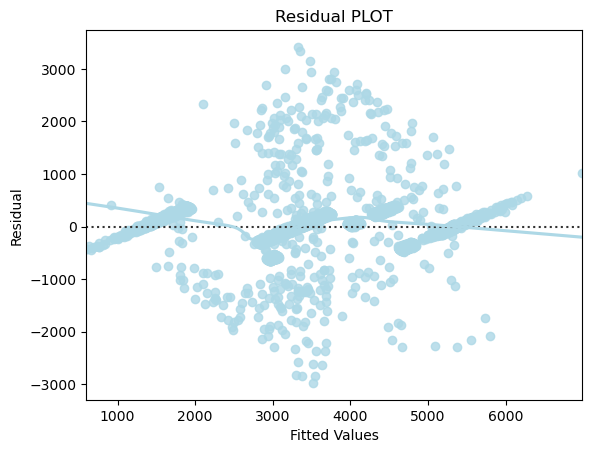

In [133]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observations:**

- There is no pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satisfied.

### **4. Normality of error terms**

The residuals should be normally distributed.

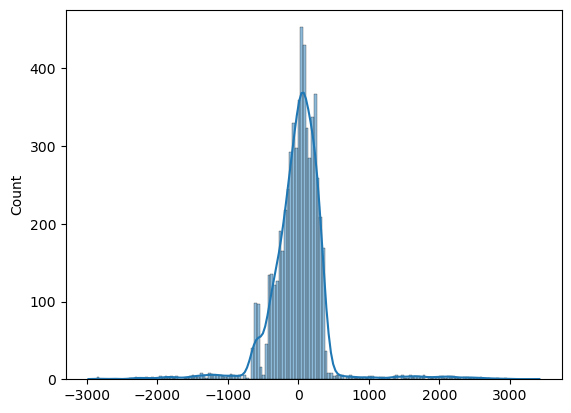

In [134]:
# Plot histogram of residuals
_ = sns.histplot(residuals, kde = True)

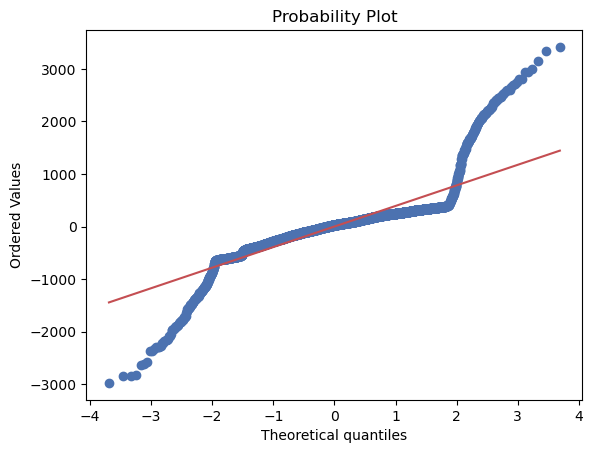

In [135]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

**Observations:**

- From the above plots, the residuals seem to follow a normal distribution. Hence, the corresponding assumption is satisfied. Now, we will check the model performance on the train and test datasets.

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data. 

In [136]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.823 (+/- 0.045)
Mean Squared Error: 200712.689 (+/- 64085.512)


In [137]:
# Checking model5 performance
linearregression.fit(X_train, y_train)
model_pref(linearregression, X_train, X_test)

    Data        RMSE         MAE        r2
0  Train  446.667654  262.110666  0.785927
1   Test  446.685287  266.690587  0.790208


**Observation:**

- After applying cross-validation the model score has improved. We can compare it by the evaluation metric scores.

## **Actionable Insights and Business Recommendations**

___________________________________________________________________________